In [1]:
import pandas as pd
import numpy as np

# 获取波士顿数据集的 URL
data_url = "http://lib.stat.cmu.edu/datasets/boston"

# 加载数据
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# 处理数据，将其转换为所需格式
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# 创建 DataFrame
boston_df = pd.DataFrame(data, columns=[
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"])
boston_df['MEDV'] = target

# 查看前5行数据
print(boston_df.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


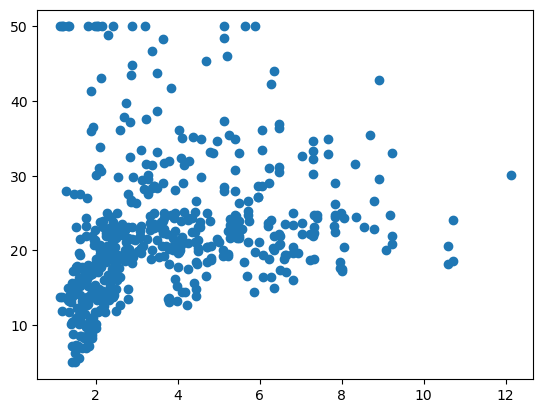

In [2]:
from matplotlib import pyplot as plt

plt.scatter(boston_df.DIS, boston_df['MEDV'])

In [3]:
boston_df['const'] = 1    # 增加常数项列 
boston_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,const
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1


用OLS一定要加上常数列

In [4]:
from statsmodels.regression.linear_model import OLS # type: ignore

model = OLS(boston_df['MEDV'], boston_df[['const', 'DIS']]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 30 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        09:43:41   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

model.resid_pearson-标准化后的残差

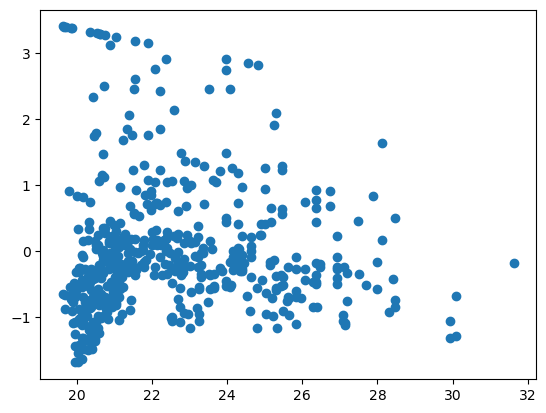

In [9]:
plt.scatter(model.fittedvalues, model.resid_pearson)

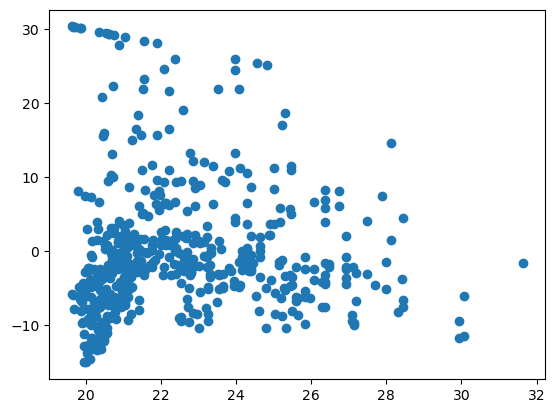

In [5]:
plt.scatter(model.fittedvalues, model.resid)

statsmodels.graphics.api提取出模型的截距和斜率

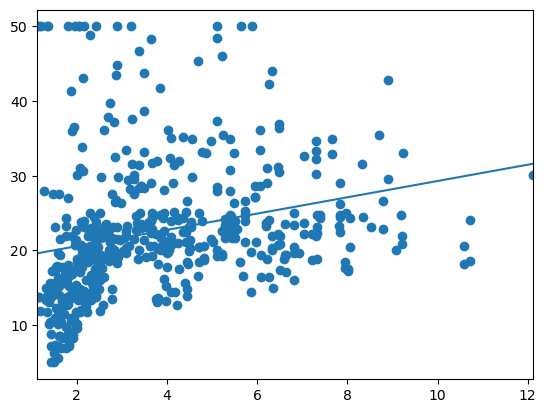

In [12]:
from statsmodels.graphics.api import abline_plot

fig = abline_plot(model_results = model)
plt.scatter(boston_df.DIS, boston_df['MEDV'])

In [ ]:
print(boston_df.feature_names)

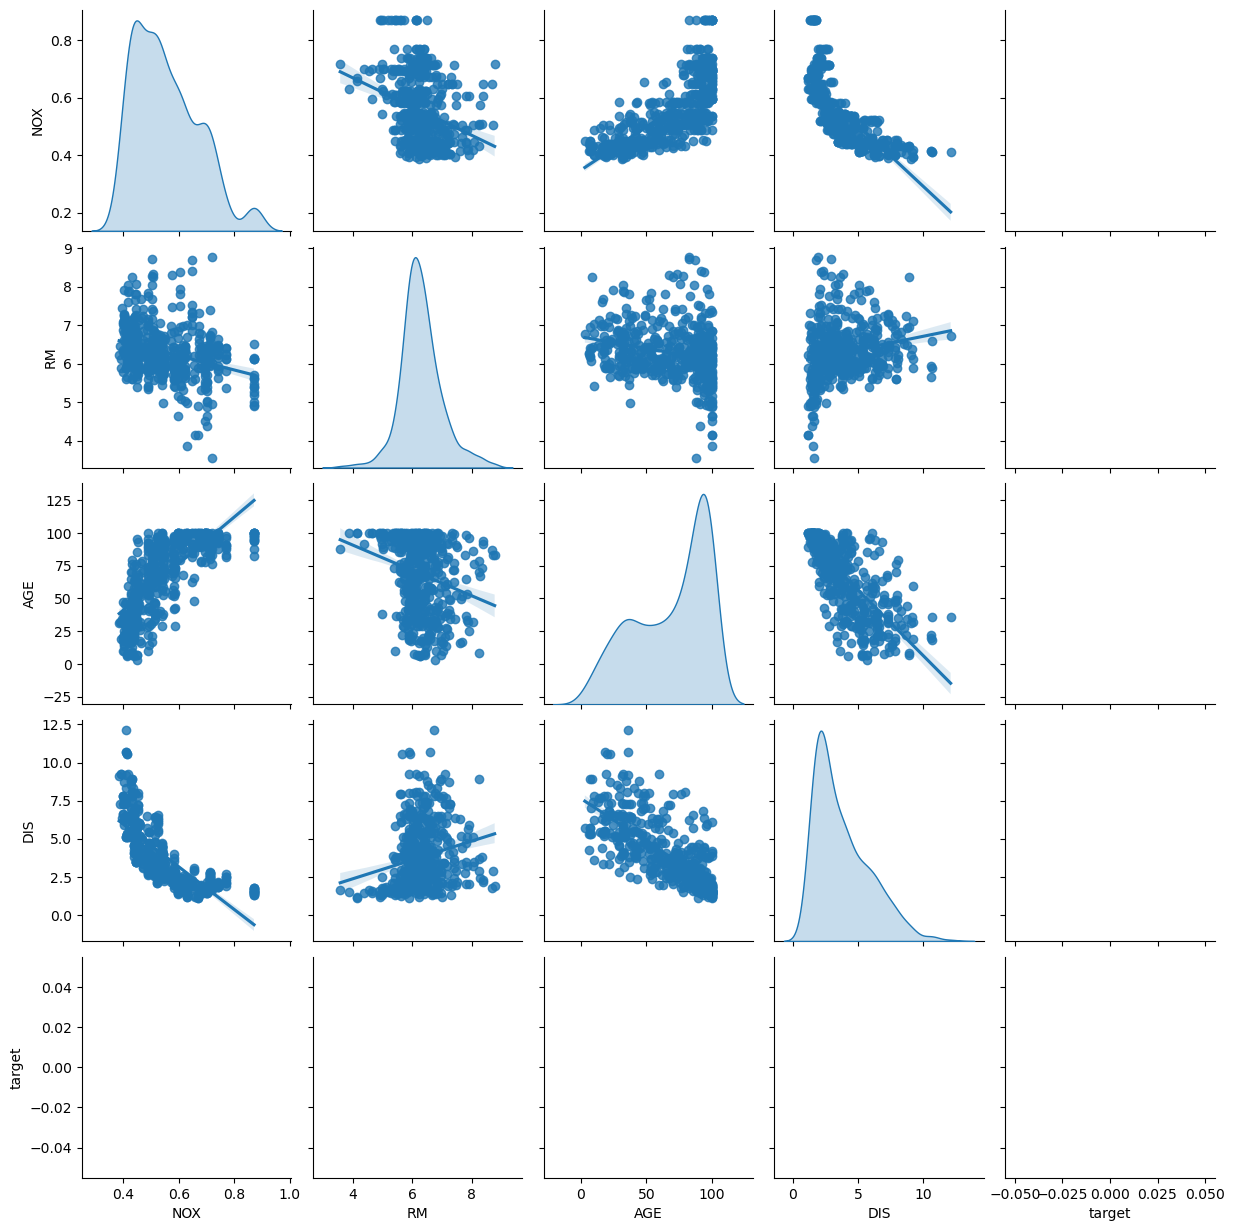

In [14]:
import seaborn as sns

target_df = pd.DataFrame(boston_df['MEDV'], columns=['target'])
df = pd.concat([boston_df, target_df], axis=1)

# columns=boston.feature_names
columns = ['NOX', 'RM', 'AGE', 'DIS', 'target']
sns.pairplot(df[columns], kind='reg', diag_kind='kde')

不能让Cond. No大于1000,否则会有多重共线性的问题

In [20]:
model = OLS(target, boston_df, missing = 'drop').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.039e+31
Date:                Fri, 30 Aug 2024   Prob (F-statistic):               0.00
Time:                        10:06:47   Log-Likelihood:                 15329.
No. Observations:                 506   AIC:                        -3.063e+04
Df Residuals:                     491   BIC:                        -3.056e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM       -3.469e-17    1.2e-16     -0.289      0.773    -2.7e-16    2.01e-16
ZN         -4.033e-17   5.01e-17     -0.804      0.422   -1.39e-16    5.82e-17
INDUS       -2.22e-16   2.22e-16     -1.000      0.318   -6.58e-16    2.14e-16
CHAS       -7.994e-15   3.14e-15     -2.545      0.011   -1.42e-14   -1.82e-15
NOX         1.465e-14   1.41e-14      1.040      0.299    -1.3e-14    4.23e-14
RM         -1.943e-15   1.63e-15     -1.191      0.234   -5.15e-15    1.26e-15
AGE        -2.132e-16   4.77e-17     -4.469      0.000   -3.07e-16   -1.19e-16
DIS         6.384e-16   7.59e-16      0.841      0.401   -8.53e-16    2.13e-15
RAD        -6.106e-16   2.45e-16     -2.496      0.013   -1.09e-15    -1.3e-16
TAX         9.888e-17   1.37e-17      7.204      0.000    7.19e-17    1.26e-16
PTRATIO     5.412e-16   4.97e-16      1.089      0.277   -4.36e-16    1.52e-15
B          -2.906e-17   9.82e-18     -2.960      0.003   -4.83e-17   -9.77e-18
LSTAT      -6.245e-17   2.02e-16     -0.309      0.757   -4.59e-16    3.35e-16
MEDV           1.0000   1.63e-16   6.14e+15      0.000       1.000       1.000
const       -1.91e-14   1.94e-14     -0.986      0.324   -5.71e-14    1.89e-14
==============================================================================
Omnibus:                        8.430   Durbin-Watson:                   0.210
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                5.315
Skew:                           0.064   Prob(JB):                       0.0701
Kurtosis:                       2.515   Cond. No.                     1.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#回归系数
model.params

In [ ]:
#标准化回归系数
model.bse

In [ ]:
#总平方和
model.centered_tss

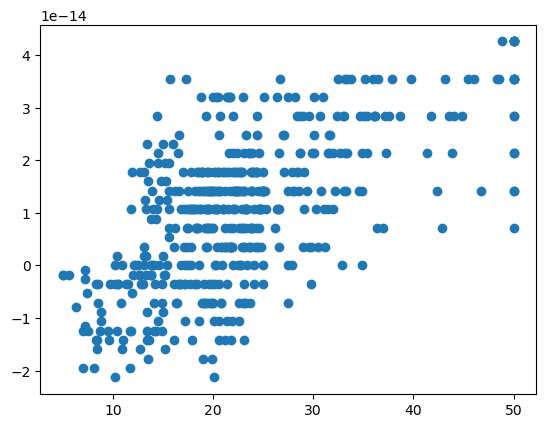

In [24]:
#多变量散点图
plt.scatter(model.fittedvalues, model.resid)